# Samostatná práce - cvičení č. 9 (ZDO)
## Klasifikace objektů

Jan Burian

## Imports

In [1]:
import skimage
import skimage.color
import skimage.measure
import numpy as np
from matplotlib import pyplot as plt
from sklearn import neighbors
from skimage.feature import corner_fast, corner_peaks

## Methods


In [10]:
def load_data(url, filenames):
    data = []
    for filename in filenames:
        img = skimage.io.imread(url + filename, as_gray=True)
        data.append(img)

    return data


def get_features(data):
    object_features = []
    for test_img in data:
        test_img_object_features = []
        test_img_labeled = skimage.measure.label(test_img > 0.5)
        region_props = skimage.measure.regionprops(test_img_labeled)
        # plt.imshow(test_img_labeled, cmap='gray')
        # plt.show()
        for object_props in region_props:
            object_area = object_props.area
            object_perimeter = object_props.perimeter
            incompatibility = (object_perimeter ** 2) / object_area
            features = [incompatibility]
            test_img_object_features.append(features)

        object_features.append(test_img_object_features)

    return np.array(object_features, dtype=object)


def get_target_data(classes):
    target_data = []
    index = -1
    for class_ in classes:
        index += 1
        for i in range(len(class_)):
            target_data.append(index)

    return target_data


def plot_test_data(test_data, filenames):
  f, axarr = plt.subplots(1, len(filenames), figsize=(20,6))
  index = 0
  for img in test_data:
    axarr[index].imshow(img, cmap="gray")
    axarr[index].set_title(filenames[index])
    index += 1
  plt.show()


def predict_data(knn, features_test_data, filenames, classes_str):
    index = 0
    for features in features_test_data:
        predictions = []
        for feature in features:
            prediction = knn.predict([feature])
            class_index = prediction[0]
            object = classes_str[class_index]
            predictions.append(object)
        print(filenames[index] + ": " + str(predictions))
        index += 1


### Training

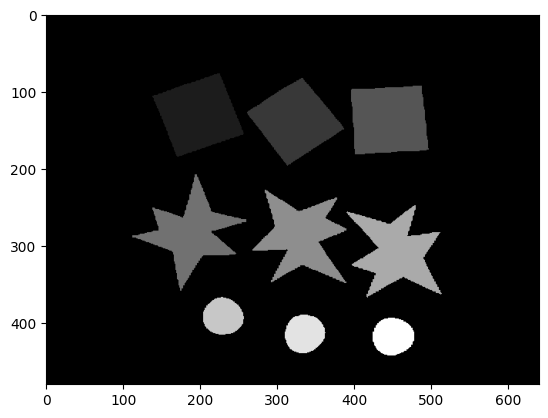

[[18.430171976946205]
 [18.42039920127975]
 [16.528820388187526]
 [51.82944878786746]
 [52.96671105433186]
 [51.33541013102532]
 [14.096501886576686]
 [13.984989110269073]
 [14.452196644709616]]
[0, 0, 0, 1, 1, 1, 2, 2, 2]


In [11]:
# Loading training data
URL = "https://raw.githubusercontent.com/mjirik/ZDO/master/objekty/"
img_training = load_data(URL, ["ctverce_hvezdy_kolecka.jpg"])

# Labelling objects
img_labeled = skimage.measure.label(img_training[0] > 0.5)
plt.imshow(img_labeled, cmap='gray')
plt.show()

# Extracting objects (0 = background)
squares = [img_labeled == 1, img_labeled == 2, img_labeled == 3]
stars = [img_labeled == 4, img_labeled == 5, img_labeled == 6]
circles = [img_labeled == 7, img_labeled == 8, img_labeled == 9]

# Classes (0 = square, 1 = star, 2 = circle)
classes = np.array([squares, stars, circles])
classes_str = ["square", "star", "circle"]

# Training data
train_data = get_features(img_training)[0]
# train_data = get_train_data(classes)
target_data = get_target_data(classes)

print(train_data)
print(target_data)

### Classifier

In [12]:
# Classifier
knn = neighbors.KNeighborsClassifier()
knn.fit(train_data, target_data)


KNeighborsClassifier()

### Testing 

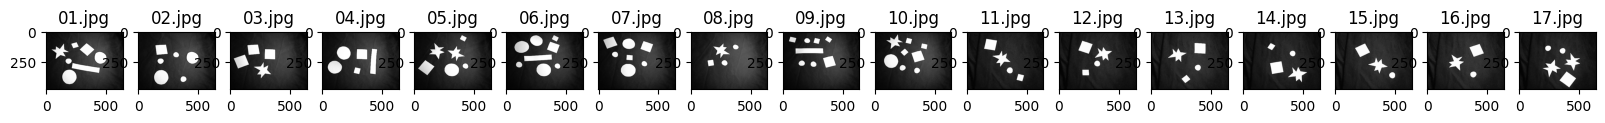

01.jpg: ['square', 'square', 'star', 'circle', 'circle', 'square', 'circle']
02.jpg: ['square', 'circle', 'square', 'circle', 'circle', 'circle', 'circle', 'circle']
03.jpg: ['square', 'circle', 'square', 'star']
04.jpg: ['circle', 'square', 'circle', 'circle', 'square']
05.jpg: ['square', 'star', 'star', 'square', 'circle', 'circle']
06.jpg: ['square', 'circle', 'circle', 'square', 'square', 'circle', 'circle', 'circle']
07.jpg: ['square', 'circle', 'square', 'circle', 'circle', 'circle', 'circle']
08.jpg: ['star', 'circle', 'square', 'circle']
09.jpg: ['square', 'square', 'square', 'circle', 'square', 'square', 'circle', 'circle']
10.jpg: ['star', 'square', 'square', 'square', 'square', 'circle', 'circle', 'circle']
11.jpg: ['square', 'star', 'circle', 'square']
12.jpg: ['square', 'star', 'circle', 'circle']
13.jpg: ['square', 'star', 'circle', 'square']
14.jpg: ['square', 'circle', 'square', 'star']
15.jpg: ['square', 'star', 'circle']
16.jpg: ['square', 'star', 'circle']
17.jpg: ['

In [13]:
# Testing data
test_data_url = "https://raw.githubusercontent.com/mjirik/ZDO/master/objekty/"
filenames = ["01.jpg", "02.jpg", "03.jpg", "04.jpg", "05.jpg", "06.jpg", "07.jpg", "08.jpg", "09.jpg",
              "10.jpg", "11.jpg", "12.jpg", "13.jpg", "14.jpg", "15.jpg", "16.jpg", "17.jpg"]
test_data = load_data(test_data_url, filenames)
features_test_data = get_features(test_data)
plot_test_data(test_data, filenames)
predict_data(knn, features_test_data, filenames, classes_str)